# Lending Club Case Study

*Author: Minh Nguyen*

## Loading Dataset and Init Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load dataset from local
df = pd.read_csv("loan.csv")
df.head(10)

/home/minhnguyen14/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Understanding

In [3]:
df.shape

(39717, 111)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
# Display the overview of dataset
print(f"Total Rows: {df.shape[0]} records - Total Columns :{df.shape[1]} columns")

Total Rows: 39717 records - Total Columns :111 columns


In [7]:
# Display the overview data type of the dataset
df.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [8]:
# Display the object column to check if we can convert them to numeric object
df[list(df.select_dtypes(include=['object']).columns)]

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,...,Computer,860xx,AZ,Jan-85,83.70%,f,Jan-15,NaN,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,...,bike,309xx,GA,Apr-99,9.40%,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,real estate business,606xx,IL,Nov-01,98.50%,f,Jun-14,NaN,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,...,personel,917xx,CA,Feb-96,21%,f,Jan-15,NaN,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,...,Personal,972xx,OR,Jan-96,53.90%,f,May-16,Jun-16,May-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,36 months,8.07%,A,A4,FiSite Research,4 years,MORTGAGE,Not Verified,Jul-07,Fully Paid,...,Home Improvement,802xx,CO,Nov-90,13.10%,f,Jul-10,NaN,Jun-10,INDIVIDUAL
39713,36 months,10.28%,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,Not Verified,Jul-07,Fully Paid,...,Retiring credit card debt,274xx,NC,Dec-86,26.90%,f,Jul-10,NaN,Jul-10,INDIVIDUAL
39714,36 months,8.07%,A,A4,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,...,MBA Loan Consolidation,017xx,MA,Oct-98,19.40%,f,Apr-08,NaN,Jun-07,INDIVIDUAL
39715,36 months,7.43%,A,A2,NaN,< 1 year,MORTGAGE,Not Verified,Jul-07,Fully Paid,...,JAL Loan,208xx,MD,Nov-88,0.70%,f,Jan-08,NaN,Jun-07,INDIVIDUAL


In [9]:
df["term"] = df["term"].apply(lambda x: int(str(x).replace("months", "")))
df["int_rate"] = df["int_rate"].apply(lambda x: float(str(x).replace("%", "")))
df["revol_util"] = df["revol_util"].apply(lambda x: float(str(x).replace("%", "")))
df["zip_code"] = df["zip_code"].apply(lambda x: int(str(x).replace("xx", "")))

df["issue_d"] = pd.to_datetime(df["issue_d"], format = "%b-%y")
df["last_pymnt_d"] = pd.to_datetime(df["last_pymnt_d"], format = "%b-%y")
df["last_credit_pull_d"] = pd.to_datetime(df["last_credit_pull_d"], format = "%b-%y")
df["next_pymnt_d"] = pd.to_datetime(df["next_pymnt_d"], format = "%b-%y")
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format = "%b-%y")

df["issue_d"]

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [10]:
# Display the label distribution of dataset
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [11]:
# Because the current loan status is not segemented as 
# default or non-default, we will filter them out of the dataframe

df = df[df.loan_status != "Current"]
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert object types to numerical category for correlation visualization

In [12]:
list(df.select_dtypes(include=['object']).columns)

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'addr_state',
 'initial_list_status',
 'application_type']

In [13]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Convert some category to numeric data by using encoder

df["loan_status_embedding"] = label_encoder.fit_transform(df["loan_status"])

df["grade_embedding"] = label_encoder.fit_transform(df["grade"])
df["sub_grade_embedding"] = label_encoder.fit_transform(df["sub_grade"])

df["emp_title_embedding"] = label_encoder.fit_transform(df["emp_title"].astype(str))
df["emp_length_embedding"] = label_encoder.fit_transform(df["emp_length"].astype(str))
df["home_ownership_embedding"] = label_encoder.fit_transform(df["home_ownership"].astype(str))
df["verification_status_embedding"] = label_encoder.fit_transform(df["verification_status"].astype(str))

df["pymnt_plan_embedding"] = label_encoder.fit_transform(df["pymnt_plan"].astype(str))
df["purpose_embedding"] = label_encoder.fit_transform(df["purpose"].astype(str))
df["title_embedding"] = label_encoder.fit_transform(df["title"].astype(str))
df["addr_state_embedding"] = label_encoder.fit_transform(df["addr_state"].astype(str))
df["initial_list_status_embedding"] = label_encoder.fit_transform(df["initial_list_status"].astype(str))
df["application_type_embedding"] = label_encoder.fit_transform(df["application_type"].astype(str))

<AxesSubplot:>

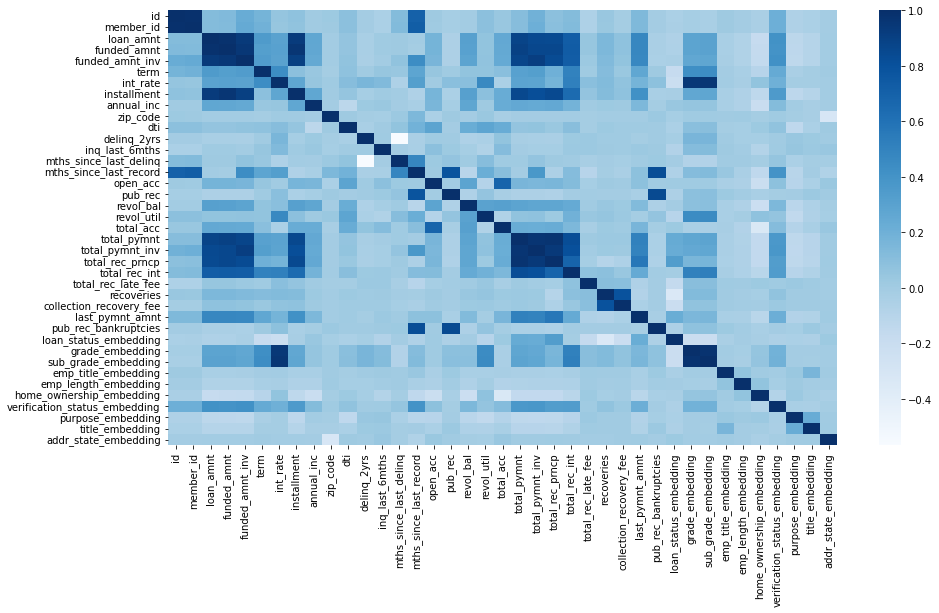

In [14]:
# Quickly check the correlation between the label columns with other columns
import seaborn as sb
from matplotlib import pyplot as plt


plt.figure(figsize=(15,8))
corr = df.corr()
corr = corr.dropna(axis=1, thresh=len(corr)*0.1)
corr = corr.dropna(axis=0, thresh=len(corr.columns)*0.1)
sb.heatmap(corr, cmap="Blues", annot=False)

# corr

<b>There are some columns that are highly correlated with others, should be considers remove when analysis</b>

## Data Cleaning

### Summary
<li> Drop Duplicates records </li>
<li> Remove rows with null values > 40% </li>
<li> Drop columns that has null value > 40% </li>
<li> Drop columns that only has 1 value </li>

In [15]:
df_filter = df.drop_duplicates(keep="first")
df_filter

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,emp_title_embedding,emp_length_embedding,home_ownership_embedding,verification_status_embedding,pymnt_plan_embedding,purpose_embedding,title_embedding,addr_state_embedding,initial_list_status_embedding,application_type_embedding
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,26678,1,4,2,0,1,2907,3,0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,18488,10,4,1,0,0,15952,10,0,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,26678,1,4,0,0,11,18581,14,0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,322,1,4,1,0,9,18476,4,0,0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,23420,3,4,1,0,13,10479,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,8120,4,0,0,0,4,7529,5,0,0
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,20141,3,4,0,0,1,13384,27,0,0
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,26678,10,0,0,0,2,9504,19,0,0
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,26678,10,0,0,0,9,8174,20,0,0


In [16]:
# Remove rows with total null features > 80% and drop columns that has total null records > 80%
df_filter = df_filter.dropna(axis=1, thresh=len(df_filter)*0.2)
df_filter = df_filter.dropna(axis=0, thresh=len(df_filter.columns)*0.2)
df_filter

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,emp_title_embedding,emp_length_embedding,home_ownership_embedding,verification_status_embedding,pymnt_plan_embedding,purpose_embedding,title_embedding,addr_state_embedding,initial_list_status_embedding,application_type_embedding
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,26678,1,4,2,0,1,2907,3,0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,18488,10,4,1,0,0,15952,10,0,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,26678,1,4,0,0,11,18581,14,0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,322,1,4,1,0,9,18476,4,0,0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,23420,3,4,1,0,13,10479,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,8120,4,0,0,0,4,7529,5,0,0
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,20141,3,4,0,0,1,13384,27,0,0
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,26678,10,0,0,0,2,9504,19,0,0
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,26678,10,0,0,0,9,8174,20,0,0


In [17]:
cols_remove = []
columns_left = df_filter.columns[df_filter.isnull().sum() > 0]
print(columns_left)
for column in columns_left:
    print("*"*100)
    print(f"Column name: {column}\n")
    print(f"Total Num: {df_filter[column].isnull().sum()} - Ratio: {round(df_filter[column].isnull().sum() * 100/len(df_filter))}%\n")
    print(f"Total Distinct Value: {len(pd.unique(df_filter[column]))}")
    print(df_filter[column].value_counts())
    if len(df_filter[column].value_counts()) == 1:
        cols_remove += [column]
    
# Drop columns that only has 1 value
df_filter = df_filter.drop(columns = cols_remove)

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
****************************************************************************************************
Column name: emp_title

Total Num: 2386 - Ratio: 6%

Total Distinct Value: 28028
US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Lengt

In [18]:
df_filter.shape

(38577, 65)

### Fill NA Columns

In [19]:
# Check the total null rows of the dataset
print(f"Total columns has null values: {sum(df_filter.isnull().sum()>0)} cols")
df_null = pd.DataFrame( data=(df_filter.isnull().sum() / len(df_filter)), columns = ["null_ratio"])
df_null["dtypes"] = df_filter[df_null.index].dtypes
df_null[df_null["null_ratio"] > 0]

Total columns has null values: 9 cols


,null_ratio,dtypes
emp_title,0.061850,object
emp_length,0.026778,object
desc,0.324727,object
title,0.000285,object
mths_since_last_delinq,0.645592,float64
revol_util,0.001296,float64
last_pymnt_d,0.001840,datetime64[ns]
last_credit_pull_d,0.000052,datetime64[ns]
pub_rec_bankruptcies,0.018068,float64


In [20]:
df_filter["emp_title"] = df_filter["emp_title"].fillna("Mising")

display(df_filter["emp_title"].describe())
display(df_filter["emp_title"].unique())

count      38577
unique     28028
top       Mising
freq        2386
Name: emp_title, dtype: object

array(['Mising', 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [21]:
df_filter["emp_length"] = df_filter["emp_length"].apply(lambda x: str(x).replace("years", "").replace("year", "").replace("<","").replace("+", "").replace("nan", "0"))
df_filter["emp_length"] = df_filter["emp_length"].fillna(0)
df_filter["emp_length"] = df_filter["emp_length"].astype(int)

display(df_filter["emp_length"].describe())
display(df_filter["emp_length"].unique())

count    38577.000000
mean         4.925526
std          3.453921
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7,  0])

In [22]:
df_filter["title"] = df_filter["title"].fillna("Mising")

display(df_filter["title"].describe())
display(df_filter["title"].unique())

count                  38577
unique                 19298
top       Debt Consolidation
freq                    2090
Name: title, dtype: object

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [23]:
df_filter["revol_util"] = df_filter["revol_util"].fillna(df_filter["revol_util"].median())

display(df_filter["revol_util"].describe())
display(df_filter["revol_util"].unique())

count    38577.000000
mean        48.703292
std         28.346356
min          0.000000
25%         25.200000
50%         49.100000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

array([8.370e+01, 9.400e+00, 9.850e+01, ..., 4.963e+01, 4.000e-02,
       7.280e+00])

In [24]:
df_filter["pub_rec_bankruptcies"] = df_filter["pub_rec_bankruptcies"].fillna(0)

display(df_filter["pub_rec_bankruptcies"].describe())
display(df_filter["pub_rec_bankruptcies"].unique())

count    38577.000000
mean         0.042694
std          0.202809
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

array([0., 1., 2.])

## EDA

### Visualize the data correlation

<AxesSubplot:>

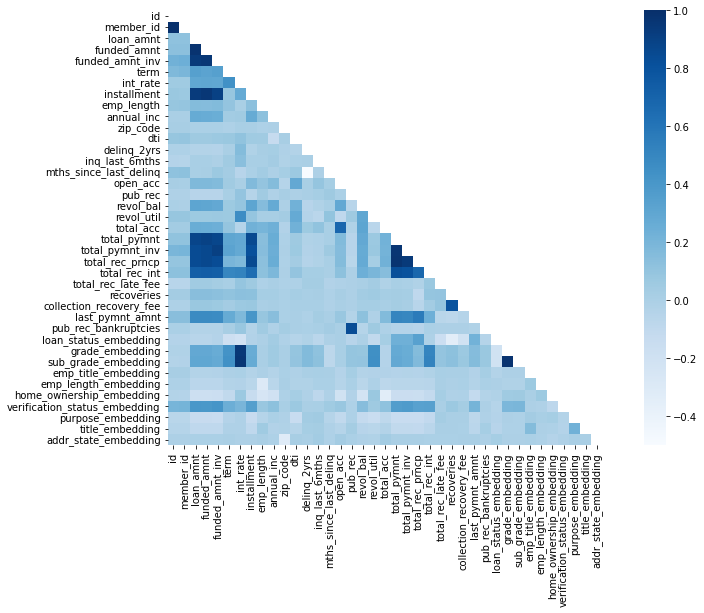

In [25]:
# Quickly check the correlation between the label columns with other columns
import seaborn as sb
from matplotlib import pyplot as plt


plt.figure(figsize=(15,8))
corr = df_filter.corr()

corr = corr.dropna(axis=1, thresh=len(corr)*0.1)
corr = corr.dropna(axis=0, thresh=len(corr.columns)*0.1)

# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

sb.heatmap(corr, annot=False, mask=mask,
            fmt='.2f', square=True, cmap="Blues", vmin=-0.5,
    vmax=1)


In [26]:
# Only Focus on the loan status column correlation
df_loan_corr = pd.DataFrame(df_filter.corrwith(df_filter['loan_status_embedding']), columns=["corr"]).sort_values(by = ["corr"], ascending=False).dropna()

# Top 5 top and bottom correlation features
list_to_analyze = list(set(df_loan_corr.head(6).append(df_loan_corr.tail(6)).index.tolist()) - {"loan_status_embedding"})
print(list_to_analyze)
df_loan_corr.head(10)

['sub_grade_embedding', 'annual_inc', 'int_rate', 'total_pymnt_inv', 'total_pymnt', 'collection_recovery_fee', 'grade_embedding', 'recoveries', 'term', 'last_pymnt_amnt', 'total_rec_prncp']


,corr
loan_status_embedding,1.000000
total_rec_prncp,0.334944
total_pymnt,0.235898
total_pymnt_inv,0.232906
last_pymnt_amnt,0.222524
annual_inc,0.040867
addr_state_embedding,0.023912
total_acc,0.022608
open_acc,0.009140
emp_length_embedding,-0.004537


In [73]:
# make general plots to examine each feature
def plot_var(df, col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(20,5))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=True, ax=ax1)
    else:
        sns.countplot(data = df, x=col_name, order = sorted(df[col_name].unique()), saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde Kernel Distribution plot of the variable gropued by loan_status
    if continuous:  
        facet = sns.FacetGrid(df, hue = 'loan_status', aspect=4)
        facet.map(sns.kdeplot, col_name, fill=True)
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(20,5))
        sns.countplot(x=col_name, hue='loan_status', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()


In [67]:
list_to_analyze

['sub_grade_embedding',
 'annual_inc',
 'int_rate',
 'total_pymnt_inv',
 'total_pymnt',
 'collection_recovery_fee',
 'grade_embedding',
 'recoveries',
 'term',
 'last_pymnt_amnt',
 'total_rec_prncp']

### Total Payment

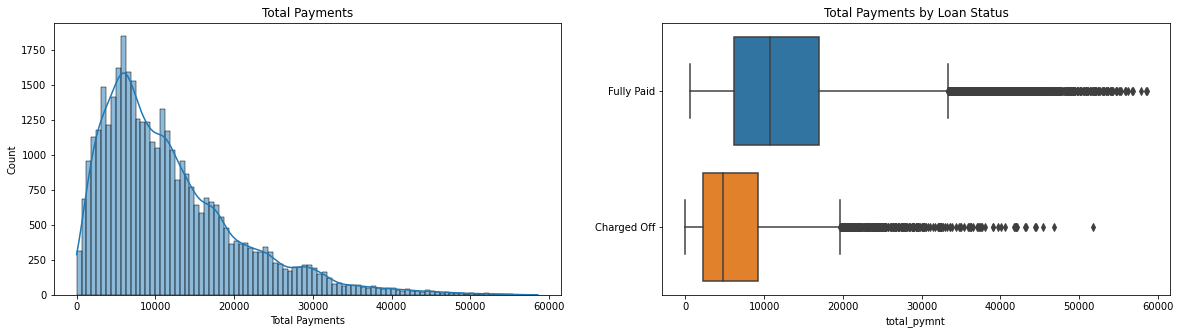

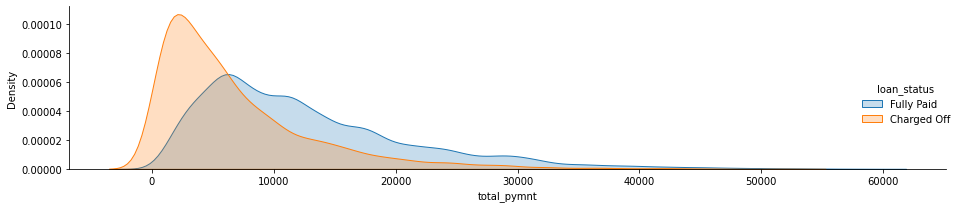

In [74]:
col = "total_pymnt"
plot_var(df_filter, col, "Total Payments", continuous=True)

<b>Insights: </b>

### Grade

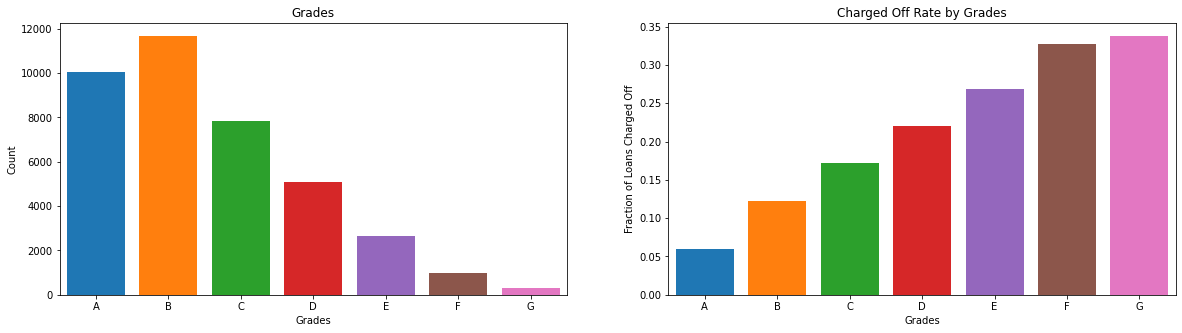

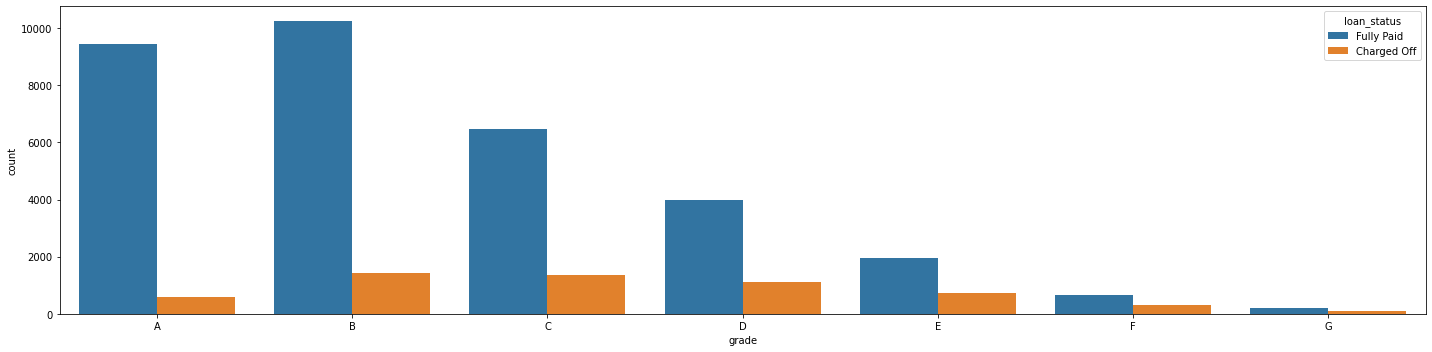

In [75]:
col = "grade"
plot_var(df_filter, col, "Grades", continuous=False)

<b>Insights: </b>

### Sub Grade

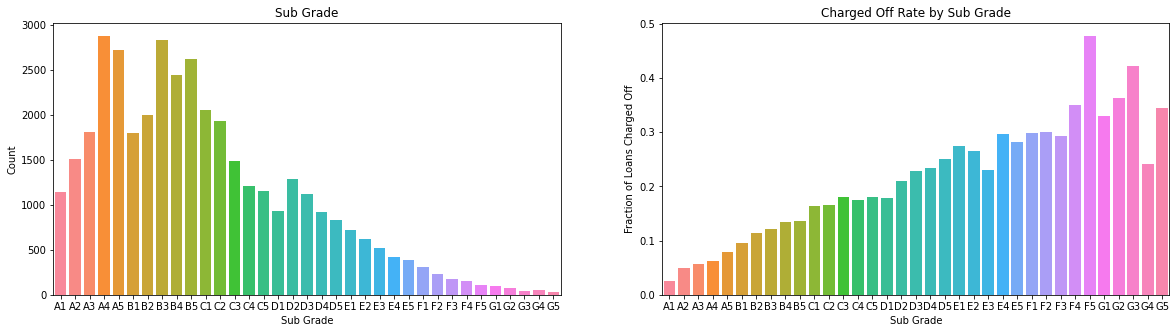

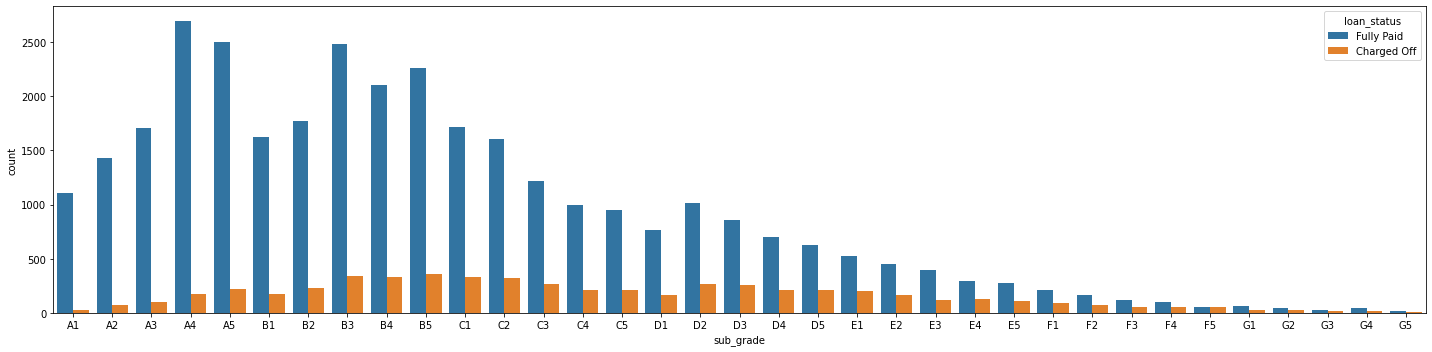

In [76]:
col = "sub_grade"
plot_var(df_filter, col, "Sub Grade", continuous=False)

<b>Insights: </b>

### Interest Rate

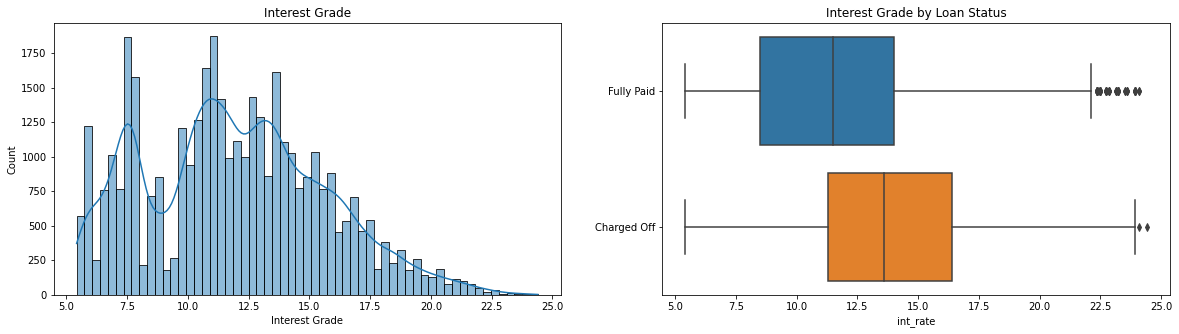

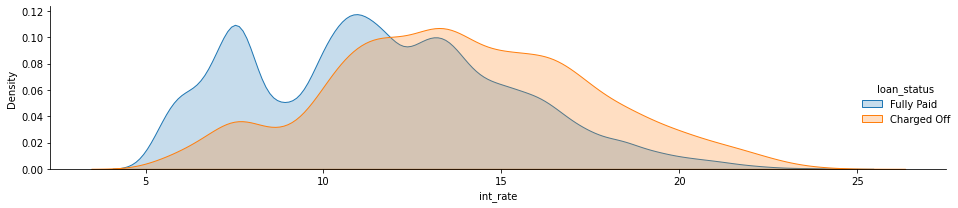

In [77]:
col = "int_rate"
plot_var(df_filter, col, "Interest Grade", continuous=True)

<b>Insights</b>

### Term

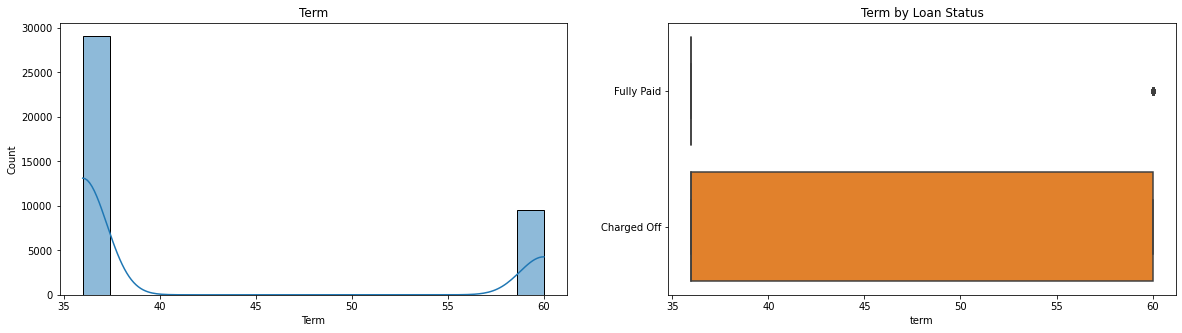

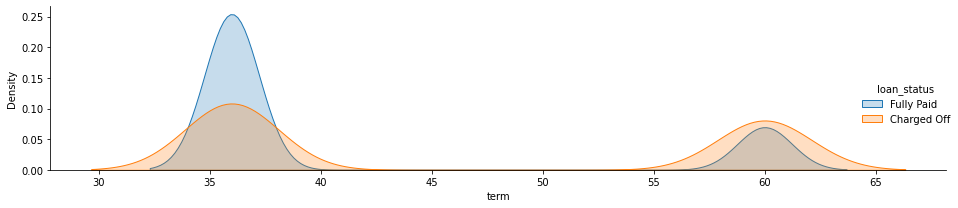

In [78]:
col = "term"
plot_var(df_filter, col, "Term", continuous=True)

<b>Insights</b>

### Principal Received to Date

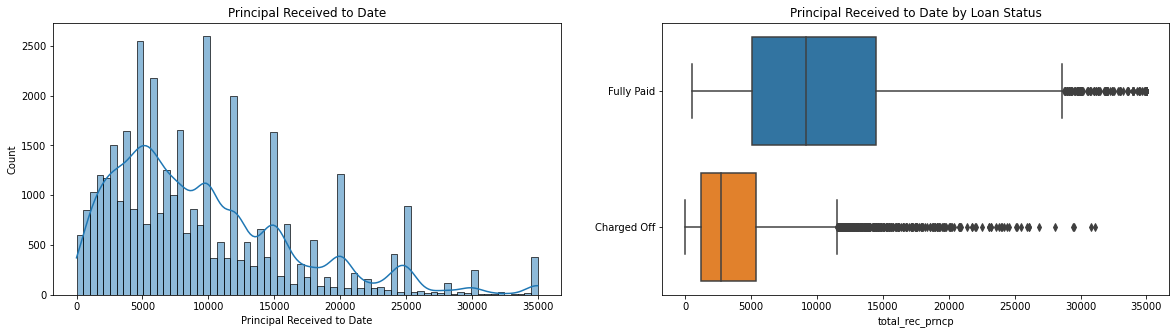

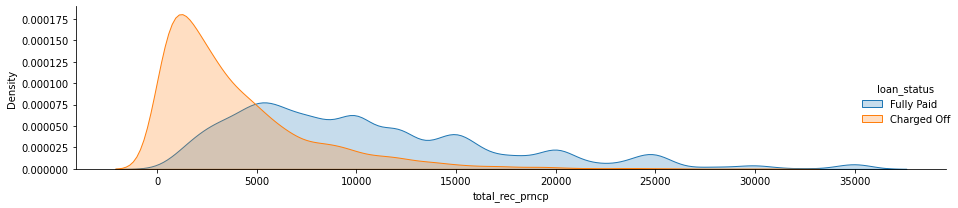

In [79]:
col = "total_rec_prncp"
plot_var(df_filter, col, "Principal Received to Date", continuous=True)

<b>Insights</b>

### Last Total Payment Amount Received

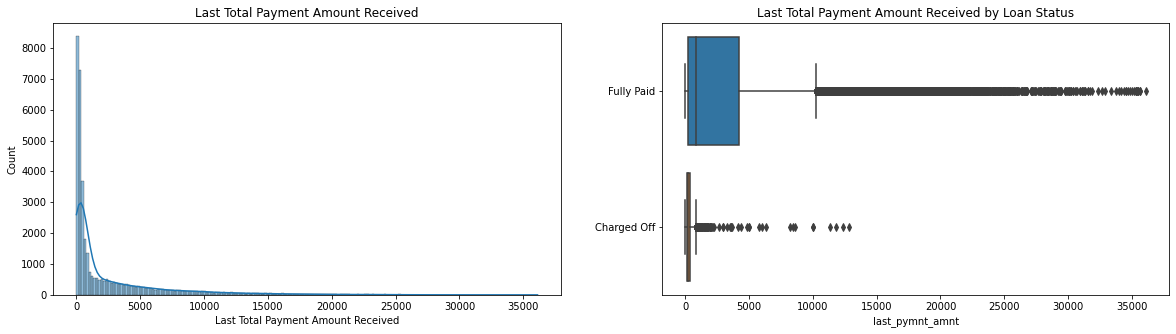

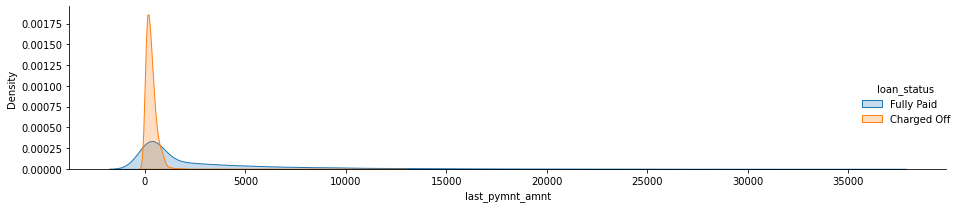

In [80]:
col = "last_pymnt_amnt"
plot_var(df_filter, col, "Last Total Payment Amount Received", continuous=True)

<b>Insights </b>

### Lending Purpose

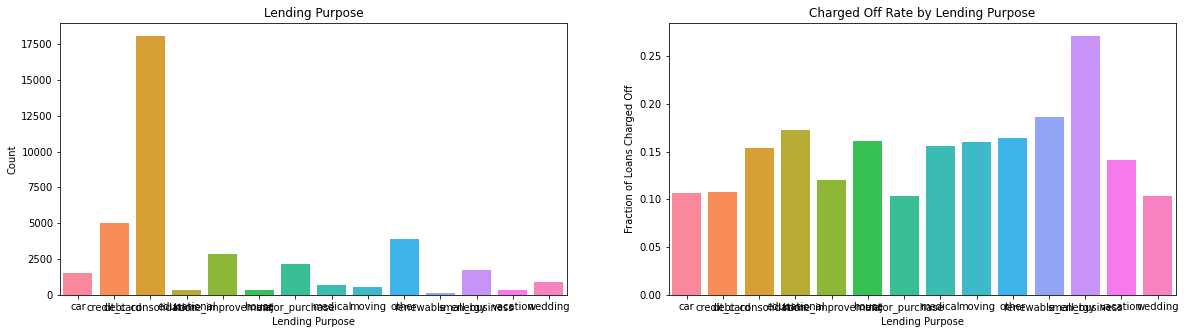

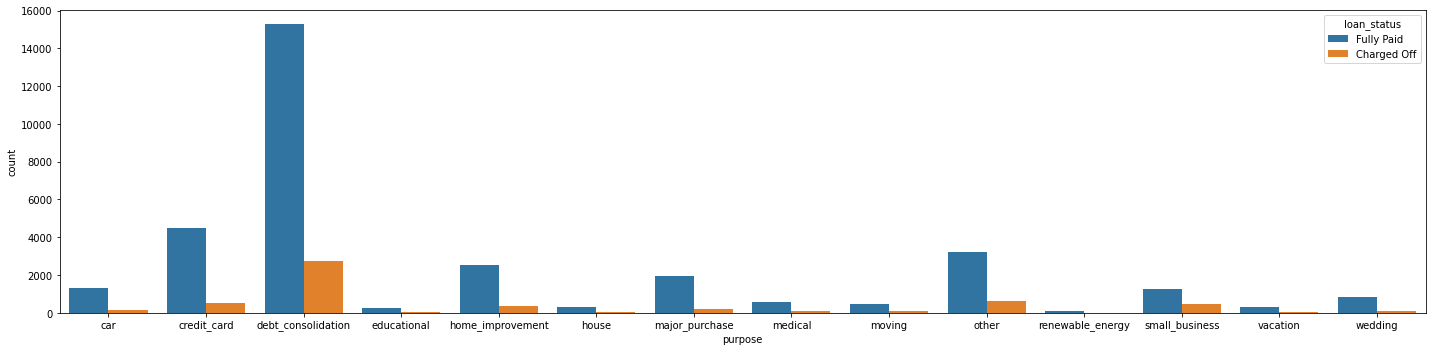

In [81]:
col = "purpose"
plot_var(df_filter, col, "Lending Purpose", continuous=False)

<b>Insights</b>

### Installment of User

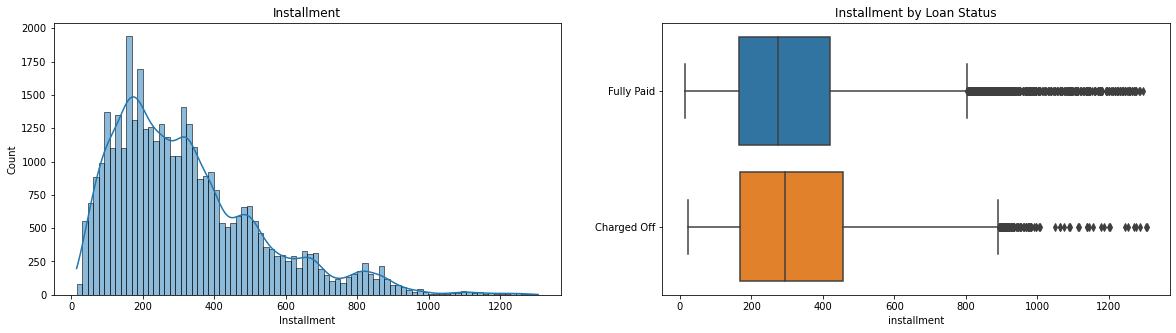

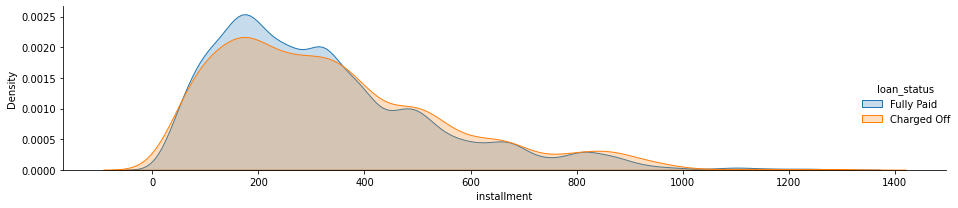

In [82]:
col = "installment"
plot_var(df_filter, col, "Installment", continuous=True)

<b>Insights</b>

<b>Insights</b>

## Graveyards

/home/minhnguyen14/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/home/minhnguyen14/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/tmp/ipykernel_24619/1839747803.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))


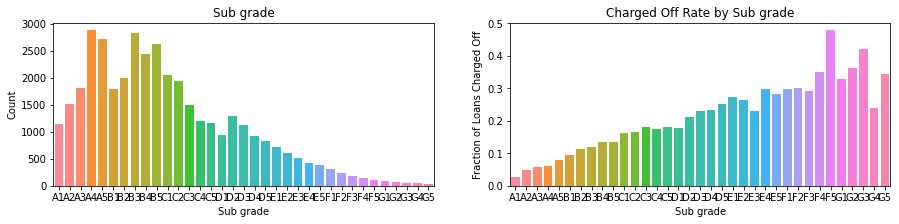

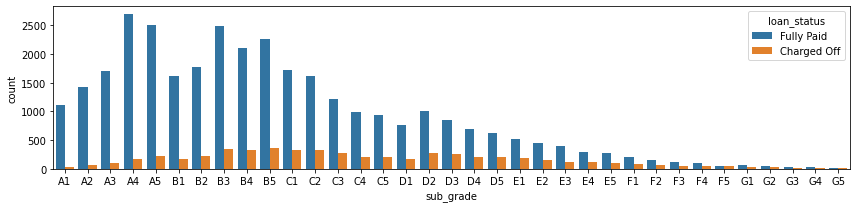

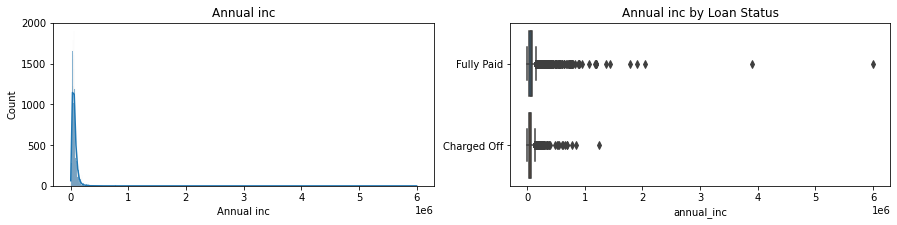

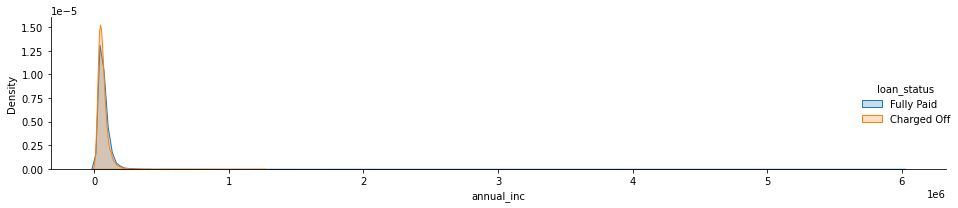

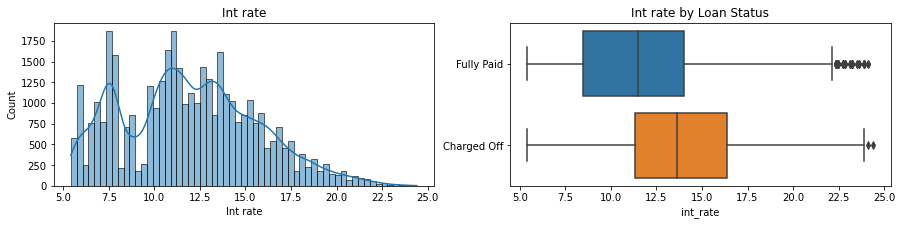

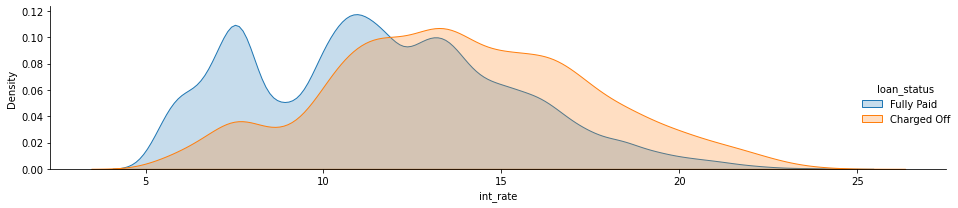

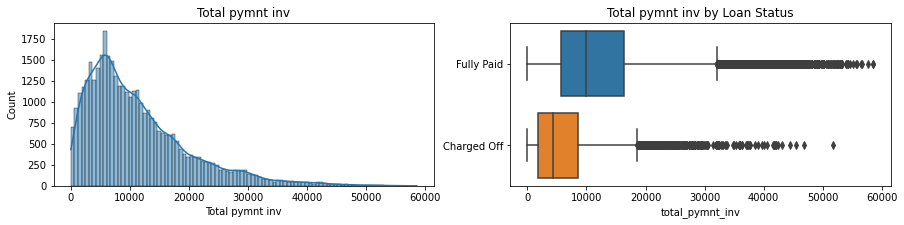

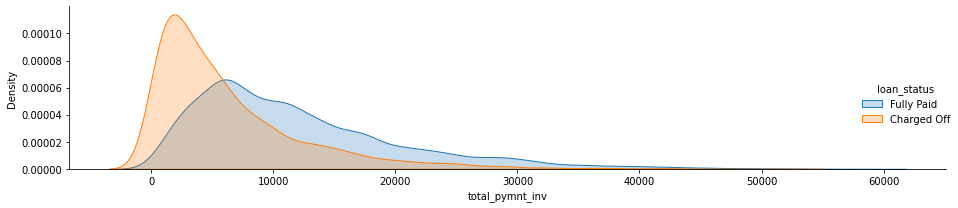

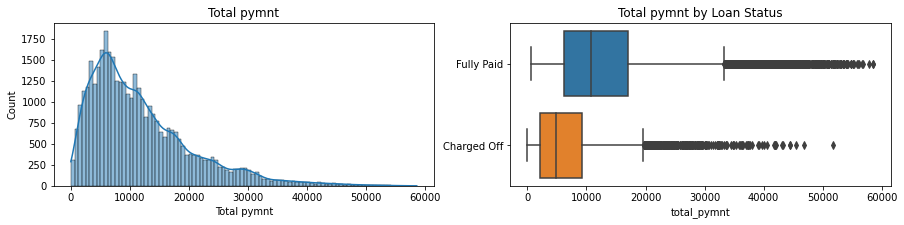

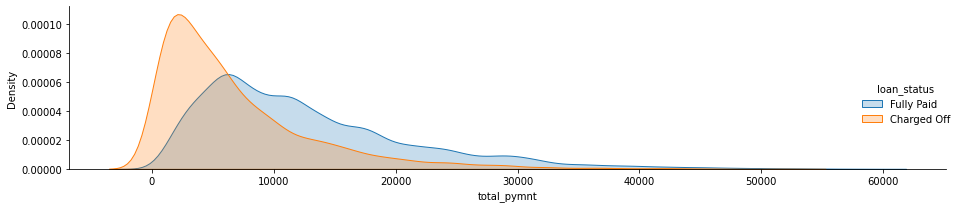

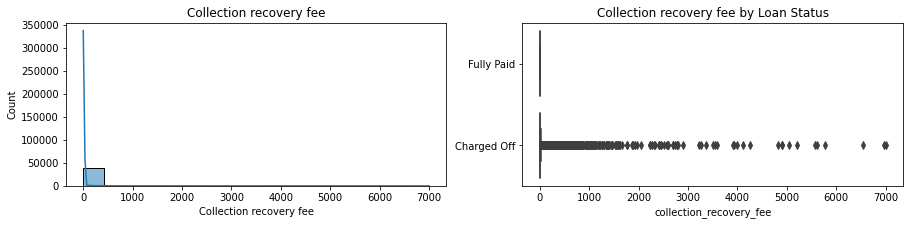

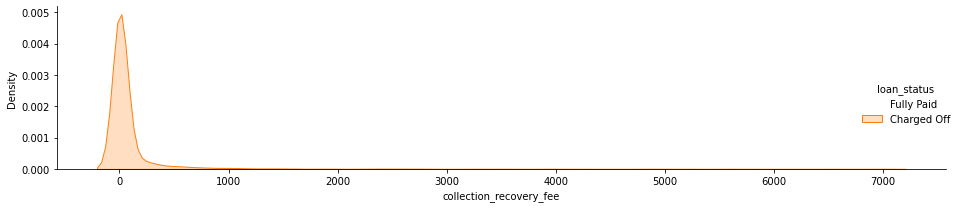

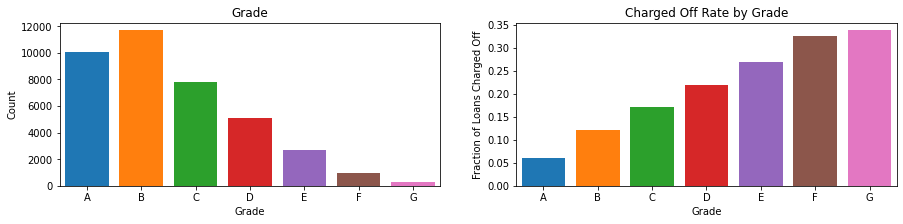

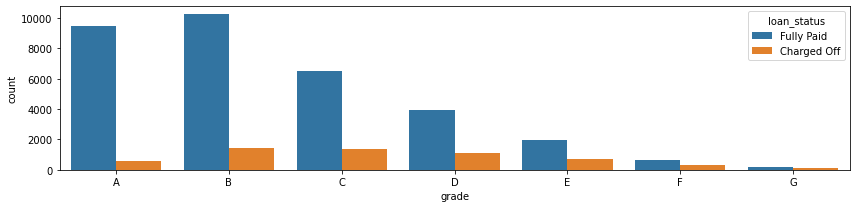

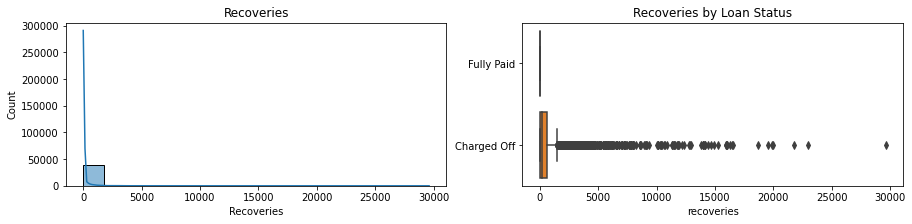

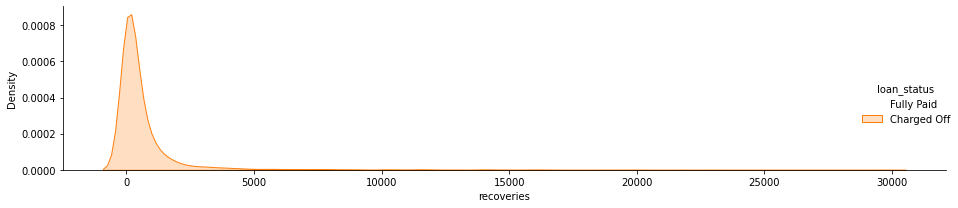

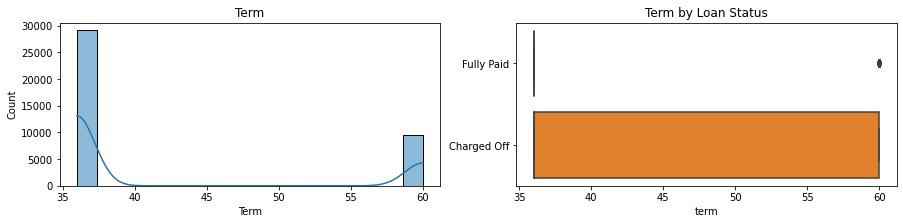

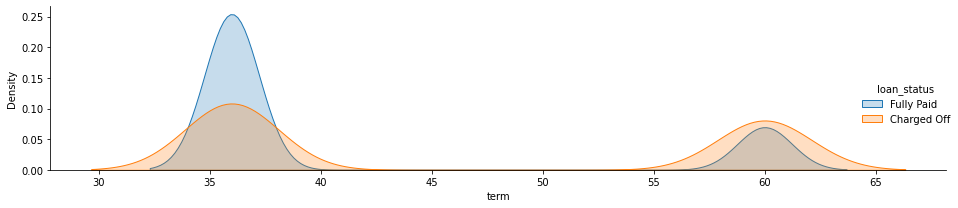

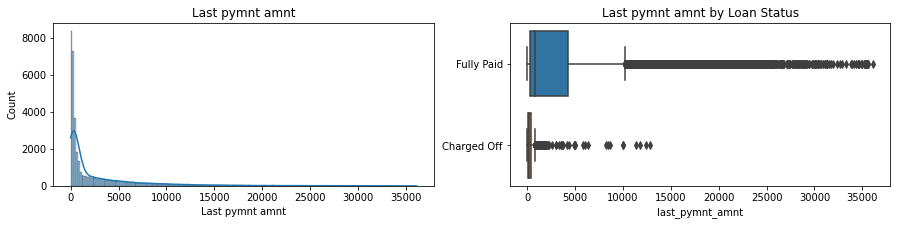

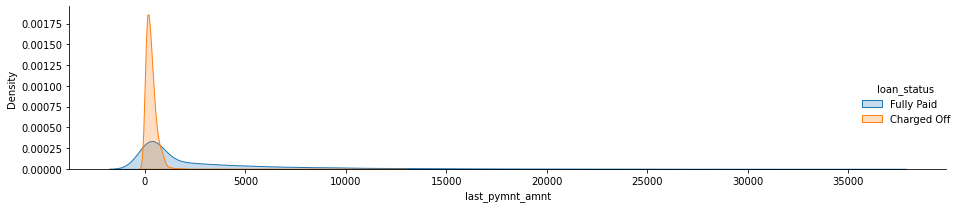

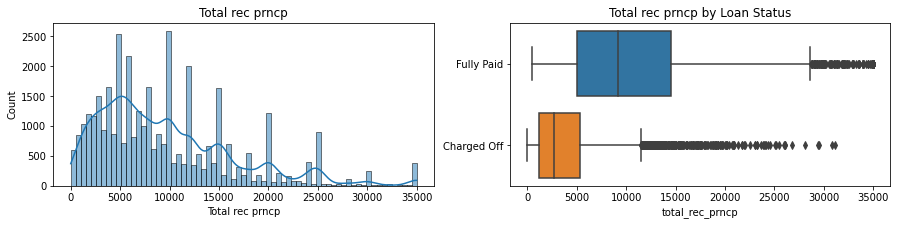

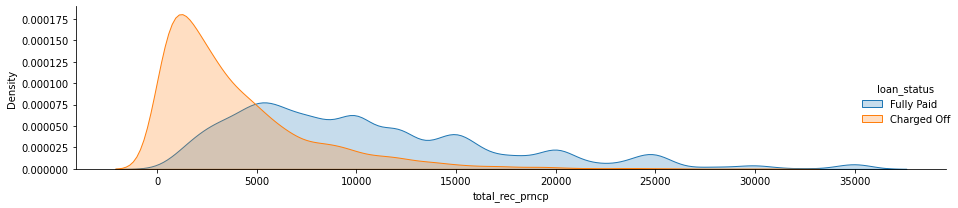

In [37]:
for col in list_to_analyze:
    if "embedding" in col:
        col = col.replace("_embedding", "")
    if df_filter[col].dtypes == "object":
        plot_var(df_filter, col, str(col).replace("_", " ").capitalize(), continuous=False)
    else:
        plot_var(df_filter, col, str(col).replace("_", " ").capitalize(), continuous=True)